In [24]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from ast import literal_eval
import pickle
import pprint
pp = pprint.PrettyPrinter(depth=6)
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)

import os
thedir = 'rtp-torrent'
dirs = [name for name in os.listdir(thedir) if os.path.isdir(os.path.join(thedir, name))]
projects = [dirname.replace("@", "/") for dirname in dirs if "@" in dirname]
projects

In [4]:
folder = "../../tmp"

In [5]:
for chunk in  pd.read_csv(f"{folder}/travistorrent_8_2_2017.csv", chunksize=10):
    cols = print(chunk.columns)
    break

Index(['tr_build_id', 'gh_project_name', 'gh_is_pr', 'gh_pr_created_at',
       'gh_pull_req_num', 'gh_lang', 'git_merged_with', 'git_branch',
       'gh_num_commits_in_push', 'gh_commits_in_push',
       'git_prev_commit_resolution_status', 'git_prev_built_commit',
       'tr_prev_build', 'gh_first_commit_created_at', 'gh_team_size',
       'git_all_built_commits', 'git_num_all_built_commits',
       'git_trigger_commit', 'tr_virtual_merged_into', 'tr_original_commit',
       'gh_num_issue_comments', 'gh_num_commit_comments', 'gh_num_pr_comments',
       'git_diff_src_churn', 'git_diff_test_churn', 'gh_diff_files_added',
       'gh_diff_files_deleted', 'gh_diff_files_modified',
       'gh_diff_tests_added', 'gh_diff_tests_deleted', 'gh_diff_src_files',
       'gh_diff_doc_files', 'gh_diff_other_files',
       'gh_num_commits_on_files_touched', 'gh_sloc', 'gh_test_lines_per_kloc',
       'gh_test_cases_per_kloc', 'gh_asserts_cases_per_kloc',
       'gh_by_core_team_member', 'gh_descrip

In [11]:
df = pd.read_csv(f"{folder}travis_projects.csv", index_col=0)
df

,tr_build_id,gh_project_name,gh_is_pr,gh_pr_created_at,gh_pull_req_num,gh_lang,git_merged_with,git_branch,gh_num_commits_in_push,gh_commits_in_push,...,tr_log_bool_tests_ran,tr_log_bool_tests_failed,tr_log_num_tests_ok,tr_log_num_tests_failed,tr_log_num_tests_run,tr_log_num_tests_skipped,tr_log_tests_failed,tr_log_testduration,tr_log_buildduration,build_successful
146754,1053608,adamfisk/LittleProxy,False,NaN,NaN,java,NaN,master,1.0,e8f1b0f7334229a4cbf91131e3757f10bb43ce24,...,True,False,0.0,0.0,NaN,0.0,NaN,0.03,NaN,False
151226,1104002,Graylog2/graylog2-server,False,NaN,NaN,java,NaN,master,1.0,9bace34b804cb936aefd11efe4e28ef69041d125,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
151227,1104009,Graylog2/graylog2-server,False,NaN,NaN,java,NaN,develop,1.0,e67571d90c1a7811aa97e084d4bed790fcd3d564,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
151233,1104095,Graylog2/graylog2-server,False,NaN,NaN,java,NaN,develop,10.0,e67571d90c1a7811aa97e084d4bed790fcd3d564#ef267...,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
151234,1104114,Graylog2/graylog2-server,False,NaN,NaN,java,NaN,develop,1.0,5bb2792d334e8b4e7770a7de7fc0babadf5841d9,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702126,156625515,DSpace/DSpace,False,NaN,NaN,java,NaN,master,NaN,NaN,...,True,False,14.0,0.0,14.0,0.0,NaN,211.63,NaN,True
3702186,156630332,facebook/buck,False,NaN,NaN,java,NaN,master,NaN,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3702253,156635590,DSpace/DSpace,False,NaN,NaN,java,NaN,master,NaN,NaN,...,True,False,14.0,0.0,14.0,0.0,NaN,256.01,NaN,True
3702265,156637933,facebook/buck,False,NaN,NaN,java,NaN,master,NaN,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [12]:
df.columns

Index(['tr_build_id', 'gh_project_name', 'gh_is_pr', 'gh_pr_created_at',
       'gh_pull_req_num', 'gh_lang', 'git_merged_with', 'git_branch',
       'gh_num_commits_in_push', 'gh_commits_in_push',
       'git_prev_commit_resolution_status', 'git_prev_built_commit',
       'tr_prev_build', 'gh_first_commit_created_at', 'gh_team_size',
       'git_all_built_commits', 'git_num_all_built_commits',
       'git_trigger_commit', 'tr_virtual_merged_into', 'tr_original_commit',
       'gh_num_issue_comments', 'gh_num_commit_comments', 'gh_num_pr_comments',
       'git_diff_src_churn', 'git_diff_test_churn', 'gh_diff_files_added',
       'gh_diff_files_deleted', 'gh_diff_files_modified',
       'gh_diff_tests_added', 'gh_diff_tests_deleted', 'gh_diff_src_files',
       'gh_diff_doc_files', 'gh_diff_other_files',
       'gh_num_commits_on_files_touched', 'gh_sloc', 'gh_test_lines_per_kloc',
       'gh_test_cases_per_kloc', 'gh_asserts_cases_per_kloc',
       'gh_by_core_team_member', 'gh_descrip

#### Number of builds per project

Text(0.5, 1.0, 'Number of builds')

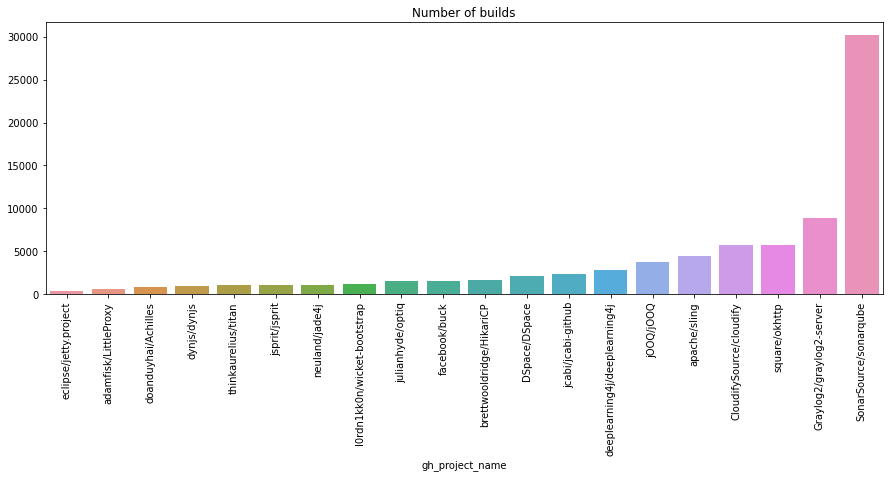

In [13]:
plt.figure(figsize=(15,5))

data=df.groupby("gh_project_name").count().tr_build_id
data=data.sort_values()

ax = sns.barplot(x=data.index,y=data.values)
ax.tick_params(axis='x', labelrotation= 90)
ax.set_title("Number of builds")

#### Number of builds with test results

Text(0.5, 1.0, 'Number of builds with test results')

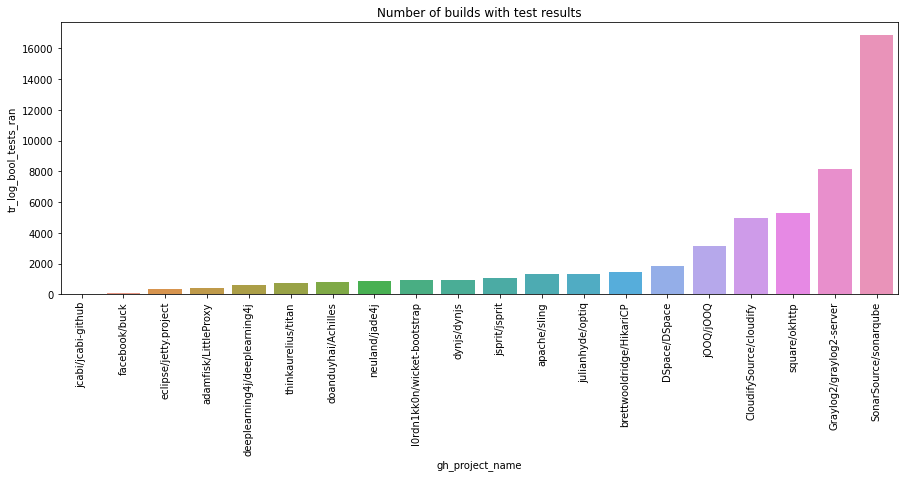

In [14]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="gh_project_name",y="tr_log_bool_tests_ran",
                 data=df.groupby(df.gh_project_name).sum().tr_log_bool_tests_ran.reset_index().sort_values(by="tr_log_bool_tests_ran"))
ax.tick_params(axis='x', labelrotation= 90)
ax.set_title("Number of builds with test results")

#### Percentage of builds with test results

Text(0.5, 1.0, 'Percentage of builds with test results')

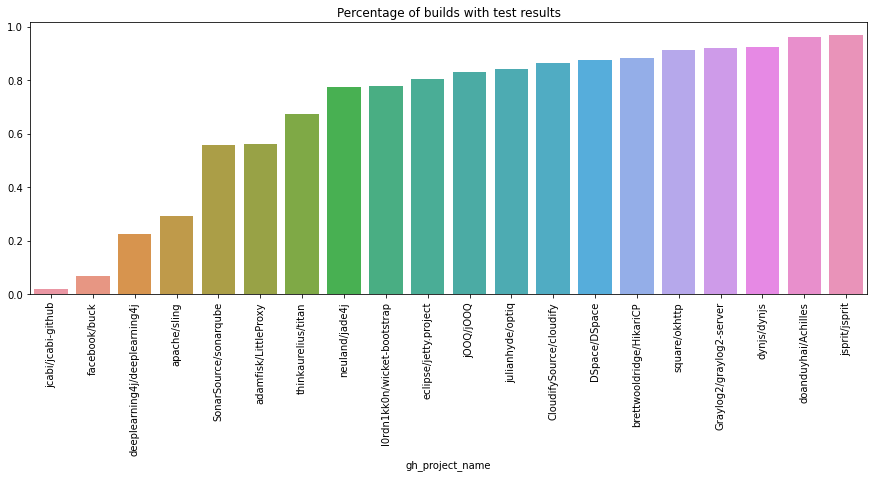

In [15]:
plt.figure(figsize=(15,5))

data=df.groupby("gh_project_name").sum().tr_log_bool_tests_ran/df.groupby("gh_project_name").tr_log_bool_tests_ran.count()
data=data.sort_values()

ax = sns.barplot(x=data.index,y=data.values)
ax.tick_params(axis='x', labelrotation= 90)
ax.set_title("Percentage of builds with test results")

## In depth analysis of a project

In [1]:
project='SonarSource/sonarqube'

In [86]:
project_df = df[df.gh_project_name == project]
project_df.sort_values(by="tr_build_id").head(10)

,tr_build_id,gh_project_name,gh_is_pr,gh_pr_created_at,gh_pull_req_num,gh_lang,git_merged_with,git_branch,gh_num_commits_in_push,gh_commits_in_push,...,tr_log_bool_tests_ran,tr_log_bool_tests_failed,tr_log_num_tests_ok,tr_log_num_tests_failed,tr_log_num_tests_run,tr_log_num_tests_skipped,tr_log_tests_failed,tr_log_testduration,tr_log_buildduration,build_successful
2310262,54731125,SonarSource/sonarqube,False,NaN,NaN,java,NaN,master,1.0,a056b278e321bac091ea3d5fe1f21ad75854e273,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.00,False
2310263,54731125,SonarSource/sonarqube,False,NaN,NaN,java,NaN,master,1.0,a056b278e321bac091ea3d5fe1f21ad75854e273,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.00,False
2310282,54734500,SonarSource/sonarqube,False,NaN,NaN,java,NaN,master,1.0,0a5224287f9dd6a3f0d3098d2f21bb4c69023f12,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.00,False
2310283,54734500,SonarSource/sonarqube,False,NaN,NaN,java,NaN,master,1.0,0a5224287f9dd6a3f0d3098d2f21bb4c69023f12,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.00,False
2310327,54738299,SonarSource/sonarqube,False,NaN,NaN,java,NaN,latest-silver-master#476,1.0,0a5224287f9dd6a3f0d3098d2f21bb4c69023f12,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.00,False
2310328,54738299,SonarSource/sonarqube,False,NaN,NaN,java,NaN,latest-silver-master#476,1.0,0a5224287f9dd6a3f0d3098d2f21bb4c69023f12,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.54,False
2310522,54745798,SonarSource/sonarqube,False,NaN,NaN,java,NaN,master,1.0,dd574e51443d8c9dc64aa7d889f7f6f1281d9ec5,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.00,False
2310523,54745798,SonarSource/sonarqube,False,NaN,NaN,java,NaN,master,1.0,dd574e51443d8c9dc64aa7d889f7f6f1281d9ec5,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.00,False
2310847,54755692,SonarSource/sonarqube,False,NaN,NaN,java,NaN,latest-silver-master#477,1.0,dd574e51443d8c9dc64aa7d889f7f6f1281d9ec5,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.00,False
2310848,54755692,SonarSource/sonarqube,False,NaN,NaN,java,NaN,latest-silver-master#477,1.0,dd574e51443d8c9dc64aa7d889f7f6f1281d9ec5,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.00,False


In [87]:
project_df.shape

(30142, 62)

**Count lines containing the project name**

Make sure all lines for the project are correctly imported in pandas

In [91]:
num_rows = 0
for row in open(f"{folder}travistorrent_8_2_2017.csv"):
    if(project in row):
        num_rows += 1
num_rows == len(project_df)

True

### Missing builds from TraviTorrent
TraviCI uses an incremental build_number. All the builds up to the highest build_number for the project should be present in the dataset

In [105]:
max_build_number = project_df.tr_build_number.max()
n_missing_builds = max_build_number - len(project_df.tr_build_number.unique())
n_missing_builds

8222

Let's plot the distribution of build_numbers to visualize if older builds are the ones more affected by this problem

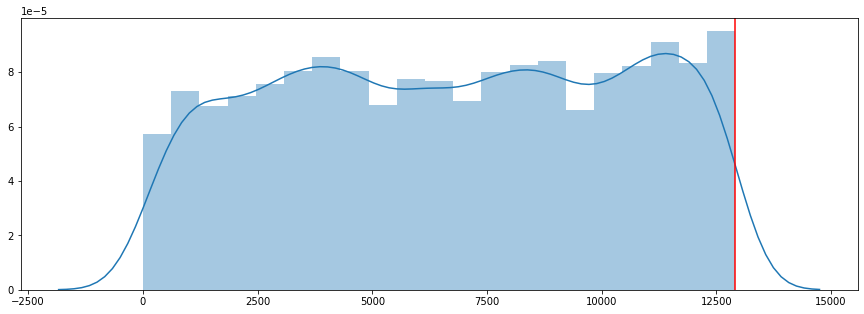

In [99]:
missing_build_numbers = []
build_numbers = project_df.tr_build_number.unique()
for i in range(0, project_df.tr_build_number.max()):
    if i not in build_numbers:
        missing_build_numbers.append(i)
sns.distplot(missing_build_numbers)
plt.axvline(max_build_number, 0, 10, color="r")

The problem seems to affect builds up until the very last build present in the dataset (the red line)

**Total number of builds for the project in TravisTorrent**

In [100]:
len(project_df.tr_build_id.unique())

4690

In [106]:
len(project_df.tr_build_id.unique()) + n_missing_builds == max_build_number

True

In [19]:
project_df[[col for col in project_df if col.startswith("tr_log")]].describe()

,tr_log_setup_time,tr_log_num_tests_ok,tr_log_num_tests_failed,tr_log_num_tests_run,tr_log_num_tests_skipped,tr_log_testduration,tr_log_buildduration
count,29929.000000,16846.000000,16846.000000,15755.000000,16846.000000,16853.000000,22978.000000
mean,3.917839,133.656536,0.023448,142.937036,5.219518,279.699226,469.346592
std,4.571636,222.944923,0.460602,227.670216,9.492445,237.153014,320.560954
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,0.000000,17.000000,0.000000,51.900000,133.000000
50%,4.000000,49.000000,0.000000,49.000000,0.000000,245.940000,452.000000
75%,4.000000,98.000000,0.000000,98.000000,4.000000,433.800000,737.000000
max,385.000000,5597.000000,21.000000,5598.000000,26.000000,1216.600000,2723.000000


plt.figure(figsize=(15,5))
plt.locator_params(axis='x', nbins=6)
ax = sns.lineplot(x="tr_build_id", y="tr_log_num_tests_run", data=project_df[["tr_build_id","tr_log_num_tests_run"]])
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

## Import RTPTorrent dataset 
This dataset contains class specific test metrics for the project's builds

In [107]:
sonar_rtp = pd.read_csv(f"{folder}rtp-torrent/SonarSource@sonarqube/SonarSource@sonarqube.csv")
sonar_rtp

,travisJobId,testName,index,duration,count,failures,errors,skipped
0,137788147,org.sonar.test.TestUtilsTest,0,0.298,4,0,0,0
1,137788147,org.sonar.test.JsonAssertTest,1,0.266,7,0,0,0
2,137788147,org.sonar.test.i18n.I18nMatchersTest,2,0.015,2,0,0,0
3,137788147,org.sonar.test.JsonComparisonTest,3,0.038,12,0,0,0
4,137788147,org.sonar.test.i18n.BundleSynchronizedMatcherTest,4,0.025,9,0,0,0
...,...,...,...,...,...,...,...,...
17134768,100821699,org.sonar.application.PropsBuilderTest,1421,0.198,7,0,0,0
17134769,100821699,org.sonar.application.CommandLineParserTest,1422,0.005,2,0,0,0
17134770,100821699,org.sonar.application.JdbcSettingsTest,1423,0.033,10,0,0,0
17134771,100821699,org.sonar.application.AppTest,1424,0.052,6,0,0,0


## TravisTorrent and RTPTorrent merging

**Are all the jobs' builds from RTPTorrent present in TravisTorrent dataset?**

In [21]:
jobIds = sonar_rtp.travisJobId.unique()

In [22]:
jobIds2 = []
for index, row in project_df.iterrows():
   jobIds2 = jobIds2 + literal_eval(row.tr_jobs)

In [40]:
len(set(jobIds) - set(jobIds2))

32321

In [110]:
(len(set(jobIds) - set(jobIds2)))/len(jobIds)

0.6063181195715385

More than 60% of the builds are missing from TravisTorrent

In [39]:
jobIds2[-1]

156501166

### TravisCI info for the project

In [2]:
from travispy import TravisPy

In [4]:
t = TravisPy()
repo = t.repo(project)

In [5]:
repo.last_build_number

'39427'

In [36]:
builds = t.builds(repository_id = repo.id, number = 1)
print(builds[0].started_at)

2015-03-17T15:04:32Z


* To this day, the project has over 39420 builds on TraviCI
* The first available build on TravisCI dates 17/3/2015

In [16]:
builds = t.builds(repository_id = repo.id, after_number = 10)
len(builds)

9

In [17]:
pp.pprint(builds[0].__slots__)

['repository_id',
 'commit_id',
 'number',
 'pull_request',
 'pull_request_title',
 'pull_request_number',
 'config',
 'started_at',
 'finished_at',
 'duration',
 'job_ids',
 'jobs',
 'commit']


In [18]:
builds[0].__slots__

['repository_id',
 'commit_id',
 'number',
 'pull_request',
 'pull_request_title',
 'pull_request_number',
 'config',
 'started_at',
 'finished_at',
 'duration',
 'job_ids',
 'jobs',
 'commit']

In [19]:
for slot in (builds[0].__slots__):
    print(slot, getattr(builds[0], slot))

repository_id 234484
commit_id 15725502
number 9
pull_request False
pull_request_title None
pull_request_number None
config {'jdk': ['oraclejdk8', 'openjdk7'], 'sudo': False, 'cache': {'directories': ['$HOME/.m2/repository']}, 'script': 'mvn clean install', '.result': 'configured', 'install': True, 'language': 'java', 'group': 'stable', 'dist': 'precise'}
started_at 2015-03-18T08:18:56Z
finished_at 2015-03-18T08:21:19Z
duration 242
job_ids [54834267, 54834268]


AttributeError: jobs

In [20]:
builds[0].job_ids

[54834267, 54834268]

## TravisCI builds for the project

In [21]:
import glob

In [23]:
v2_files = glob.glob("../travis-api-python/builds/v2/*.pkl")
v3_files = glob.glob("../travis-api-python/builds/v3/*.pkl")

In [43]:
with open(v2_files[0], 'rb') as f:
    builds2 = pickle.load(f)
v2_fields = builds2[0].keys()
v2_fields

dict_keys(['id', 'repository_id', 'commit_id', 'number', 'event_type', 'pull_request', 'pull_request_title', 'pull_request_number', 'config', 'state', 'started_at', 'finished_at', 'duration', 'job_ids'])

In [44]:
pp.pprint(builds2[0])

{'commit_id': 28112504,
 'config': {'.result': 'configured',
            'before_cache': ['find ~/.m2/repository -type d -name \\*-SNAPSHOT '
                             '-exec rm -rf {} \\;',
                             'find ~/.m2/repository -name maven-metadata-\\* '
                             '-exec rm {} \\;',
                             'find ~/.m2/repository -name '
                             'resolver-status.properties -exec rm {} \\;'],
            'cache': {'directories': ['$HOME/.m2/repository',
                                      '$HOME/.sonar',
                                      'server/sonar-web/node',
                                      'server/sonar-web/node_modules']},
            'dist': 'precise',
            'env': ['TARGET=CI',
                    'TARGET=IT IT_CATEGORY=Category1',
                    'TARGET=IT IT_CATEGORY=Category2',
                    'TARGET=IT IT_CATEGORY=Category3',
                    'TARGET=IT IT_CATEGORY=Category4',
       

In [74]:
with open(v3_files[0], 'rb') as f:
    builds3 = pickle.load(f)
v3_fields = builds3[0].keys()
v3_fields

dict_keys(['@type', '@href', '@representation', '@permissions', 'id', 'number', 'state', 'duration', 'event_type', 'previous_state', 'pull_request_title', 'pull_request_number', 'started_at', 'finished_at', 'private', 'repository', 'branch', 'tag', 'commit', 'jobs', 'stages', 'created_by', 'updated_at'])

In [75]:
pp.pprint(builds3[0])

{'@href': '/build/264330283',
 '@permissions': {'cancel': False, 'read': True, 'restart': False},
 '@representation': 'standard',
 '@type': 'build',
 'branch': {'@href': '/repo/234484/branch/janos%2Fvalidate-branch-config2',
            '@representation': 'minimal',
            '@type': 'branch',
            'name': 'janos/validate-branch-config2'},
 'commit': {'@representation': 'minimal',
            '@type': 'commit',
            'committed_at': '2017-08-14T11:50:13Z',
            'compare_url': 'https://github.com/SonarSource/sonarqube/compare/5857120b9aed...a23fba6ffb44',
            'id': 76913412,
            'message': 'Add incrementalMode param to '
                       'BrnachConfigurationValidator.validate',
            'ref': 'refs/heads/janos/validate-branch-config2',
            'sha': 'a23fba6ffb44e00b09009e8032bd42517479225e'},
 'created_by': {'@href': '/user/437829',
                '@representation': 'minimal',
                '@type': 'user',
                'id': 

In [45]:
common_fields = set(v3_fields).intersection(set(v2_fields))
common_fields

{'duration',
 'event_type',
 'finished_at',
 'id',
 'number',
 'pull_request_number',
 'pull_request_title',
 'started_at',
 'state'}

In [46]:
uncommon_fields = set(v3_fields).symmetric_difference(set(v2_fields))
uncommon_fields

{'@href',
 '@permissions',
 '@representation',
 '@type',
 'branch',
 'commit',
 'commit_id',
 'config',
 'created_by',
 'job_ids',
 'jobs',
 'previous_state',
 'private',
 'pull_request',
 'repository',
 'repository_id',
 'stages',
 'tag',
 'updated_at'}

## Builds retrival

In [66]:
builds_tuple = []

#### Version 2 retrieval

In [67]:
for v2_file in v2_files:
    with open(v2_file, 'rb') as f:
        builds2 = pickle.load(f)
        for build in builds2:
            build_values = []
            for field in common_fields:
                build_values.append(build[field])
            builds_tuple.append(tuple(build_values))

#### Version 3 retrieval

In [68]:
for v3_file in v3_files:
    with open(v3_file, 'rb') as f:
        builds3 = pickle.load(f)
        for build in builds3:
            build_values = []
            for field in common_fields:
                build_values.append(build[field])
            builds_tuple.append(tuple(build_values))

In [69]:
pd.DataFrame(builds_tuple, columns = common_fields)

,finished_at,pull_request_number,number,duration,id,state,event_type,pull_request_title,started_at
0,2015-12-28T16:34:08Z,NaN,6995,5361.0,99118995,failed,push,None,2015-12-28T16:18:41Z
1,2015-12-28T14:36:03Z,NaN,6994,5953.0,99100662,passed,push,None,2015-12-28T14:18:30Z
2,2015-12-28T13:27:51Z,NaN,6993,5166.0,99093472,passed,push,None,2015-12-28T13:11:39Z
3,2015-12-28T12:18:41Z,NaN,6992,5243.0,99086186,passed,push,None,2015-12-28T12:10:56Z
4,2015-12-28T10:56:34Z,NaN,6991,5045.0,99078711,passed,push,None,2015-12-28T10:41:16Z
...,...,...,...,...,...,...,...,...,...
39378,2018-02-07T13:38:25Z,NaN,36432,191.0,338500570,passed,push,None,2018-02-07T13:36:19Z
39379,2018-02-07T13:45:47Z,NaN,36431,859.0,338500019,failed,push,None,2018-02-07T13:35:06Z
39380,2018-02-07T13:57:02Z,NaN,36430,1543.0,338499772,passed,push,None,2018-02-07T13:34:31Z
39381,2018-02-07T13:48:27Z,3028.0,36429,1331.0,338498110,passed,pull_request,SONAR-10364 upgrade protobuf to 3.2.0,2018-02-07T13:29:37Z


## Jobs

In [71]:
job_tuples = []

In [73]:
for v2_file in v2_files:
    with open(v2_file, 'rb') as f:
        builds2 = pickle.load(f)
        for build in builds2:
            build_values = []
            for job in build["job_ids"]:
                job_tuples.append((build["id"], job))

In [76]:
for v3_file in v3_files:
    with open(v3_file, 'rb') as f:
        builds3 = pickle.load(f)
        for build in builds3:
            build_values = []
            for job in build["jobs"]:
                job_tuples.append((build["id"], job["id"]))

In [77]:
pd.DataFrame(job_tuples, columns = ["build_id", "job_id"])

,build_id,job_id
0,99118995,99118996
1,99118995,99118997
2,99118995,99118998
3,99118995,99118999
4,99118995,99119000
...,...,...
136661,338499772,338499774
136662,338498110,338498111
136663,338498110,338498112
136664,338498094,338498095
